In [35]:
# 2.1 Data Loading

# Library Loading
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Data loading for fashion-MNIST
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

# Class names from HW1.pdf
class_names = ["T_shirt", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
#                 0           1           2          3        4        5        6         7        8          9

# Validation set is splitted from training set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42, shuffle=True
)

# Print the shapes of the training, validation, and test sets to verify the split.
print("Training data shape:", X_train.shape, "Labels:", y_train.shape)
print("Validation data shape:", X_val.shape, "Labels:", y_val.shape)
print("Test data shape:", X_test_full.shape, "Labels:", y_test_full.shape)

Training data shape: (48000, 28, 28) Labels: (48000,)
Validation data shape: (12000, 28, 28) Labels: (12000,)
Test data shape: (10000, 28, 28) Labels: (10000,)


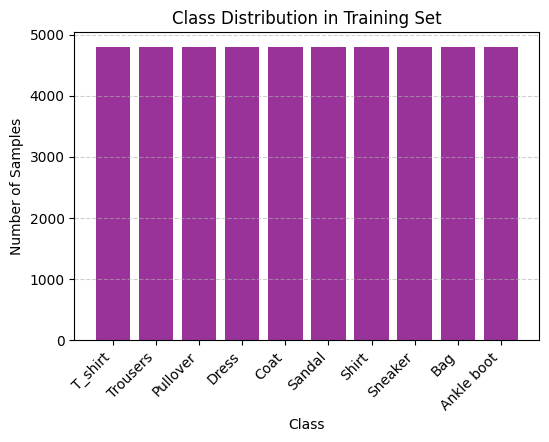

In [3]:
# Data Analysis, taken from Recit 1

# 2.2 Distribution of Classes
import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)

# Plot class distribution
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color="purple", alpha=0.8)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Set")
plt.xticks(unique, class_names, rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [4]:
# Pixel Analysis
pixel_mean = np.mean(X_train)
pixel_std = np.std(X_train)

print(f"Mean of pixel values: {pixel_mean:.2f}")
print(f"Standard deviation of pixel values: {pixel_std:.2f}")

print("-------------------------------------------------------")

for i in range(10):
  print(f"{class_names[i]}: mean pixel intensity = {(np.mean(X_train[y_train == i])):.2f}")



Mean of pixel values: 72.99
Standard deviation of pixel values: 90.06
-------------------------------------------------------
T_shirt: mean pixel intensity = 82.85
Trousers: mean pixel intensity = 56.99
Pullover: mean pixel intensity = 96.49
Dress: mean pixel intensity = 66.12
Coat: mean pixel intensity = 98.10
Sandal: mean pixel intensity = 34.80
Shirt: mean pixel intensity = 84.83
Sneaker: mean pixel intensity = 42.84
Bag: mean pixel intensity = 90.17
Ankle boot: mean pixel intensity = 76.76


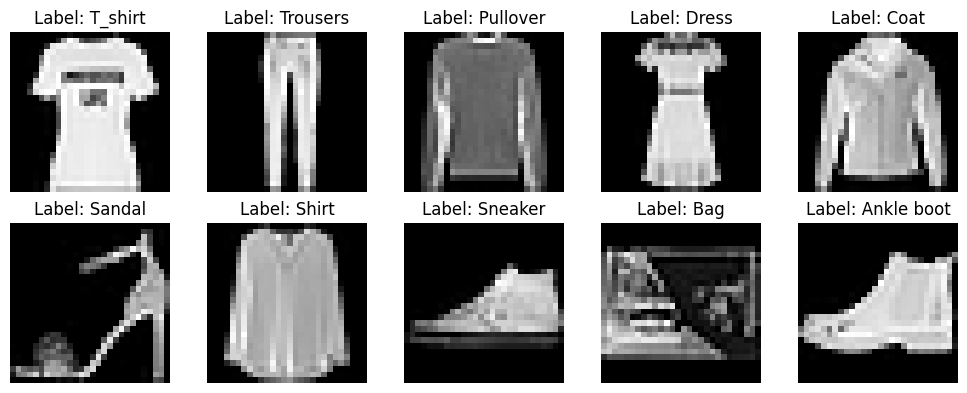

In [5]:
# Visualize 1 sample for each class

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    idx = np.where(y_train == i)[0][0]
    ax.imshow(X_train[idx], cmap="gray")
    ax.set_title(f"Label: {class_names[i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [6]:
# 2.3 Preprocessing

# Flatten images
X_train_flat = X_train.reshape(len(X_train), -1)
X_val_flat = X_val.reshape(len(X_val), -1)
X_test_flat = X_test_full.reshape(len(X_test_full), -1)

# Normalize with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("Before scaling:")
print(f"Mean: {np.mean(X_train_flat):.2f} Std {np.std(X_train_flat):.2f}")
print("After scaling:")
print(f"Mean: {np.mean(X_train_scaled):.2f} Std {np.std(X_train_scaled):.2f}")

Before scaling:
Mean: 72.99 Std 90.06
After scaling:
Mean: 0.00 Std 1.00


In [7]:
# 3 k-NN Classifier

# 3.1 Hyperparameter Tuning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Hyperparameter search space
k_values = [1,3,5,7]
metrics = ["euclidean", "manhattan"]

results = {}

# Iterate over hyperparameters
for metric in metrics:
    # Train classifier
    for k in k_values:
      start = time.time()

      knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
      knn.fit(X_train_scaled, y_train)

      # Evaluate on validation set
      y_val_pred = knn.predict(X_val_scaled)
      val_accuracy = accuracy_score(y_val, y_val_pred)

      results[(k, metric)] = val_accuracy
      end = time.time()
      print(f"k = {k}, metric = {metric} -> Validation Accuracy: {val_accuracy:.4f}, time = {end - start}")




k = 1, metric = euclidean -> Validation Accuracy: 0.8521, time = 37.17511057853699
k = 3, metric = euclidean -> Validation Accuracy: 0.8553, time = 37.33245134353638
k = 5, metric = euclidean -> Validation Accuracy: 0.8548, time = 37.33037710189819
k = 7, metric = euclidean -> Validation Accuracy: 0.8562, time = 37.17358160018921
k = 1, metric = manhattan -> Validation Accuracy: 0.8570, time = 698.9470572471619
k = 3, metric = manhattan -> Validation Accuracy: 0.8631, time = 721.766090631485
k = 5, metric = manhattan -> Validation Accuracy: 0.8661, time = 720.8943235874176
k = 7, metric = manhattan -> Validation Accuracy: 0.8643, time = 713.1845734119415


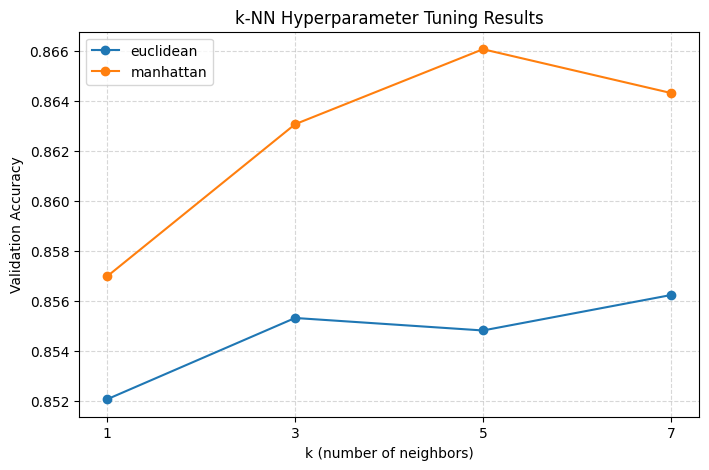

In [34]:
# Display the hyperparameter results
plt.figure(figsize=(8,5))

for metric in metrics:
    accs = [results[(k,metric)] for k in k_values]
    plt.plot(k_values, accs, marker='o', label=metric)

plt.xlabel("k (number of neighbors)")
plt.ylabel("Validation Accuracy")
plt.title("k-NN Hyperparameter Tuning Results")
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [9]:
# Best hyperparameters

best_k = None
best_metric = None
best_accuracy = 0

for (k, metric), accuracy in results.items():
    if accuracy > best_accuracy:
        best_k = k
        best_metric = metric
        best_accuracy = accuracy
print(f"Best k: {best_k}, Best metric: {best_metric}, Best accuracy: {best_accuracy:.4f}")

Best k: 5, Best metric: manhattan, Best accuracy: 0.8661


In [10]:
# Final Model

# Combine train + val sets
X_final = np.concatenate((X_train_scaled, X_val_scaled))
y_final = np.concatenate((y_train, y_val))

knn_final = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

start = time.time()
knn_final.fit(X_final, y_final)
learn = time.time()
y_pred = knn_final.predict(X_test_scaled)
predict = time.time()

print(f"Training time: {learn - start:.2f}s")
print(f"Prediction time: {predict - learn:.2f}s")

# Evaluation
from sklearn.metrics import classification_report

print("Test Accuracy:", accuracy_score(y_test_full, y_pred))
print("\nClassification Report (Macro):\n", classification_report(y_test_full, y_pred, target_names=class_names, digits=3))


Training time: 0.04s
Prediction time: 733.33s
Test Accuracy: 0.8613

Classification Report (Macro):
               precision    recall  f1-score   support

     T_shirt      0.771     0.859     0.813      1000
    Trousers      0.992     0.967     0.979      1000
    Pullover      0.730     0.795     0.761      1000
       Dress      0.898     0.878     0.888      1000
        Coat      0.768     0.767     0.767      1000
      Sandal      0.990     0.902     0.944      1000
       Shirt      0.656     0.577     0.614      1000
     Sneaker      0.912     0.960     0.935      1000
         Bag      0.980     0.938     0.959      1000
  Ankle boot      0.928     0.970     0.949      1000

    accuracy                          0.861     10000
   macro avg      0.863     0.861     0.861     10000
weighted avg      0.863     0.861     0.861     10000



Confusion Matrix for KNN:
[[859   2  15  19   6   1  91   0   7   0]
 [  6 967   3  13   6   0   4   0   1   0]
 [ 21   0 795  10  90   0  83   0   1   0]
 [ 34   4  13 878  43   0  27   0   1   0]
 [  3   0 124  27 767   0  77   0   2   0]
 [  1   0   0   2   0 902   0  56   1  38]
 [189   1 125  24  77   0 577   1   6   0]
 [  0   0   0   0   0   4   0 960   0  36]
 [  1   1  14   5  10   2  19   9 938   1]
 [  0   0   0   0   0   2   1  27   0 970]]


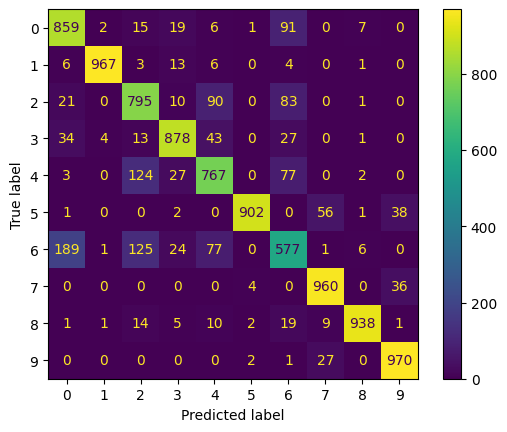

In [32]:
# Confussion Matrix

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_full, y_pred)
print("Confusion Matrix for KNN:")
print(cm_knn)

# We can visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test_full, y_pred=y_pred)

Top 3 most confused class pairs:
Shirt ↔ T_shirt: 189 errors
Shirt ↔ Pullover: 125 errors
Coat ↔ Pullover: 124 errors

Examples: True=Shirt, Pred=T_shirt


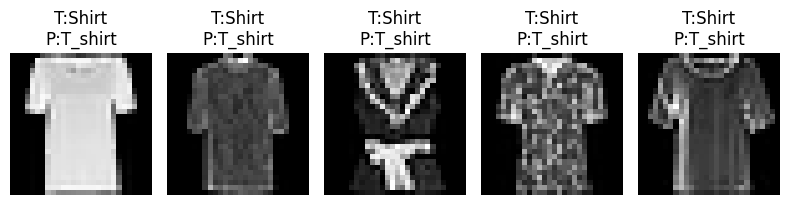


Examples: True=Shirt, Pred=Pullover


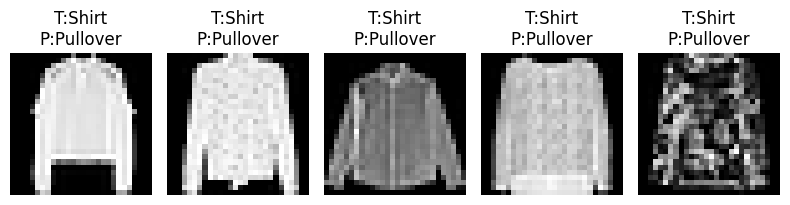


Examples: True=Coat, Pred=Pullover


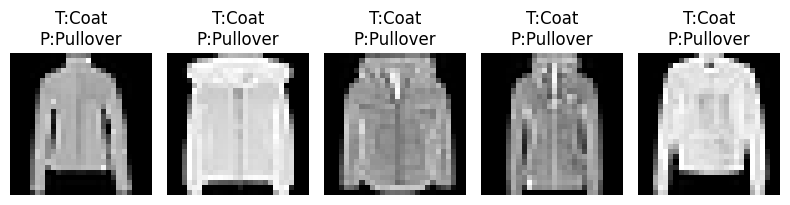

In [31]:
# 4 Error Analysis
cm_normalized = cm_knn / cm_knn.sum(axis=1)[:, np.newaxis]
confused_pairs = []

for i in range(10):
    for j in range(10):
        if i != j:
            confused_pairs.append(((i,j), cm_knn[i,j]))

# Most confused 3 pairs
top_confused = sorted(confused_pairs, key=lambda x: x[1], reverse=True)[:3]
print("Top 3 most confused class pairs:")
for pair, count in top_confused:
    print(f"{class_names[pair[0]]} ↔ {class_names[pair[1]]}: {count} errors")


# Visualize random misclassified examples
for (i, j), _ in top_confused:
    print(f"\nExamples: True={class_names[i]}, Pred={class_names[j]}")

    mis_idx = np.where((y_test_full == i) & (y_pred == j))[0]

    if len(mis_idx) == 0:
        print("No misclassified examples found.")
        continue

    # Random 5 samples
    random_idx = np.random.choice(mis_idx, size=min(5, len(mis_idx)), replace=False)

    plt.figure(figsize=(8, 2))
    for k, idx in enumerate(random_idx):
        plt.subplot(1, 5, k + 1)
        plt.imshow(X_test_full[idx], cmap='gray')
        plt.title(f"T:{class_names[i]}\nP:{class_names[j]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()